In [1]:
import os
import pandas as pd

from src.constants import *

In [4]:
with open(os.path.join(DATA_PATH, "2021AB_SN", "SG"), "r") as f:
    group_df = pd.read_csv(f, sep="|", header=None)

full_names = {}
for abbrev, name in group_df[[0,1]].itertuples(index=False):
    if abbrev not in full_names.keys():
        full_names[abbrev] = name.upper()

In [16]:
list_rows = []
type_dictionnary = {}

for filename in os.listdir(ARTICLES_PATH):
        
    with open(os.path.join(ARTICLES_PATH, filename, "entities.csv"), "r") as f:
        entities_df = pd.read_csv(f).drop("Unnamed: 0", axis=1)
    
    for (w, t) in entities_df[['Word', 'Type']].apply(tuple, axis=1):
        if t == "ENTITY":
            t = "UNDEF"
        elif t in full_names.keys():
            t = full_names[t]
        if t not in type_dictionnary.keys():
            type_dictionnary[t] = [str(w)]
        else:
            type_dictionnary[t].append(str(w))

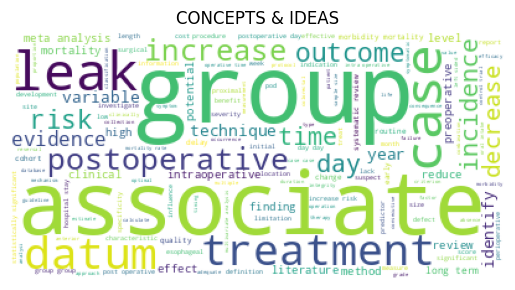

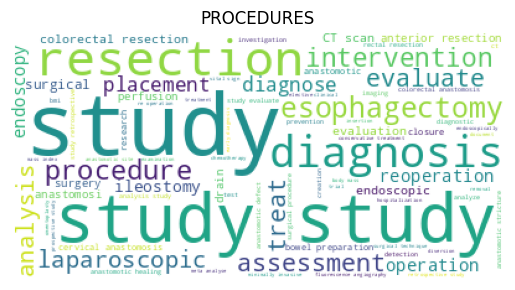

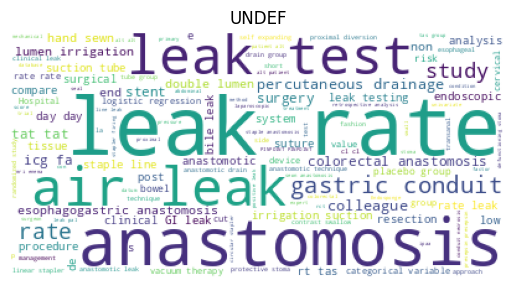

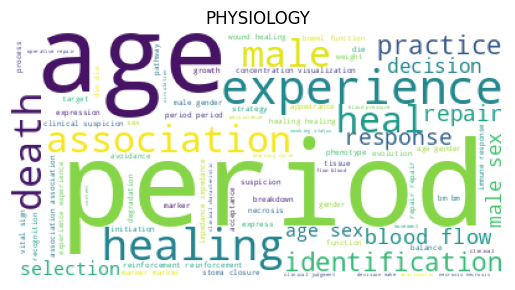

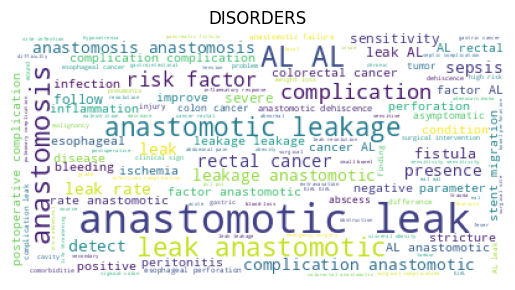

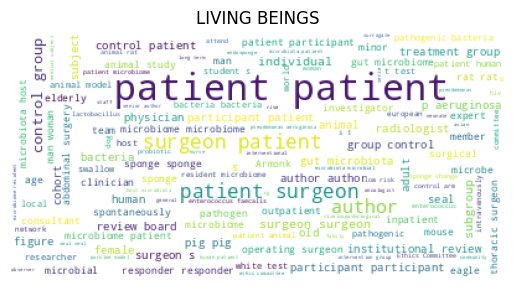

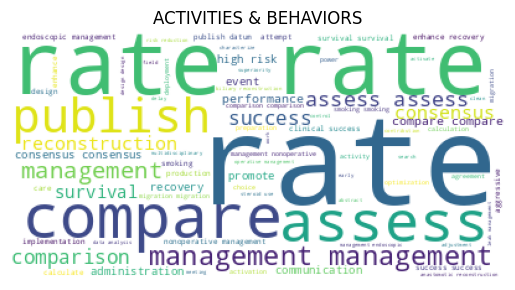

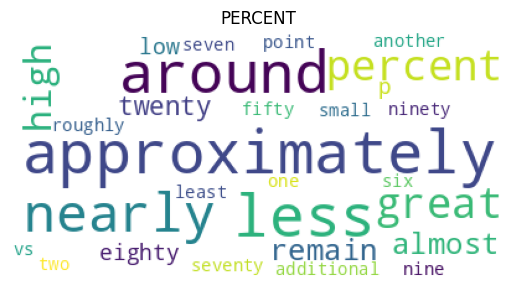

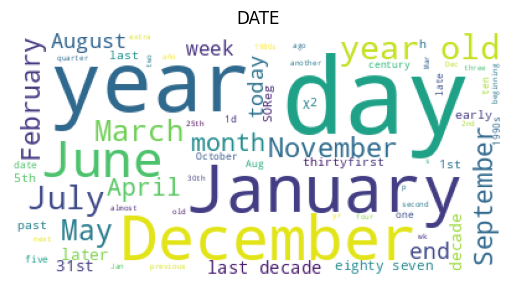

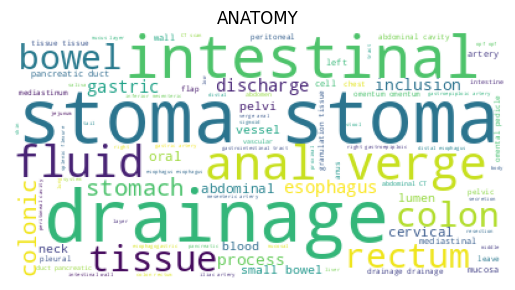

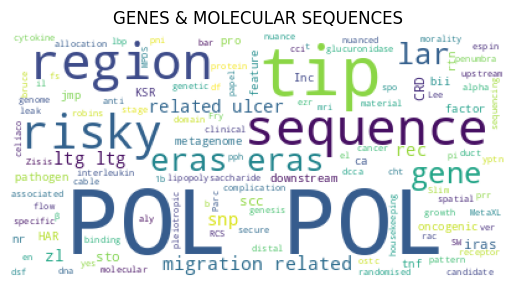

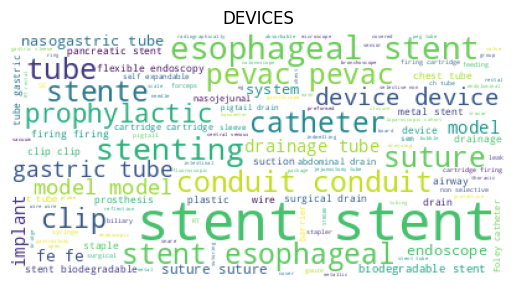

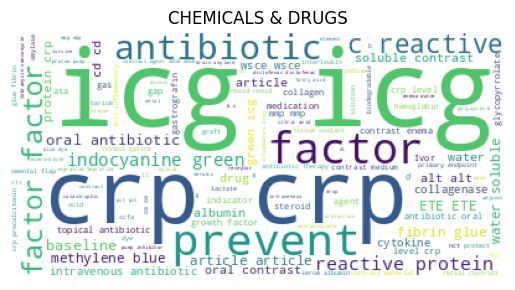

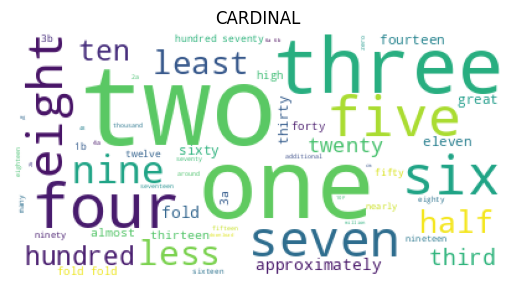

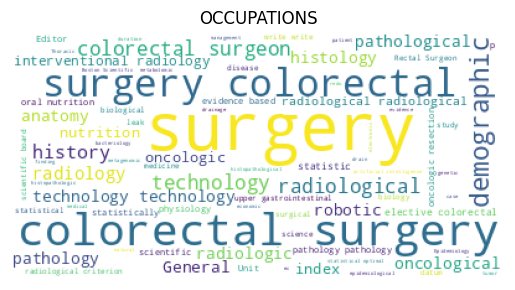

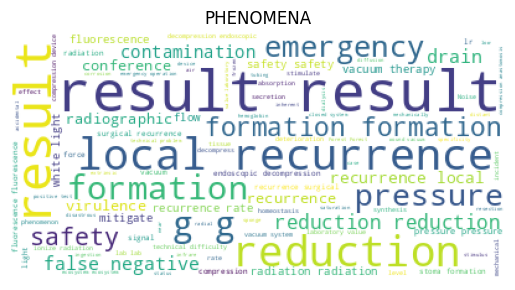

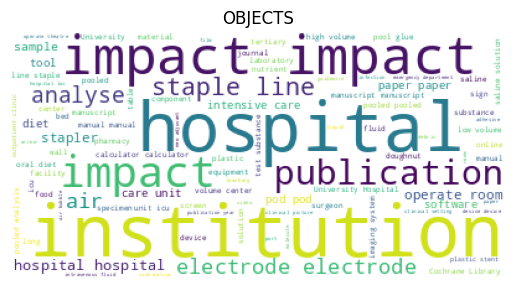

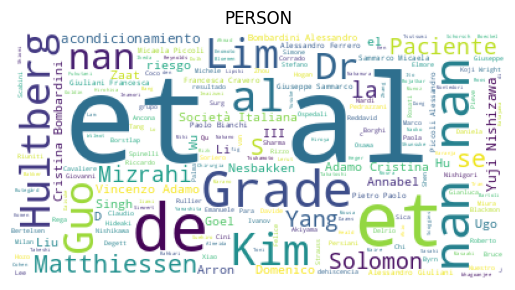

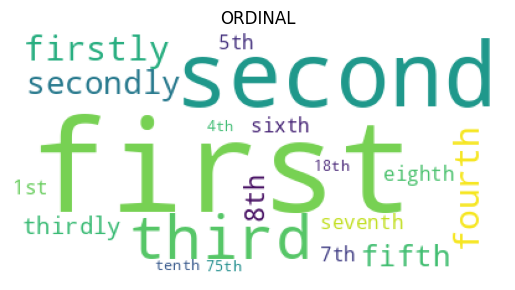

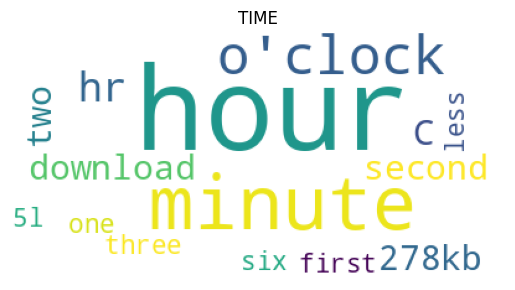

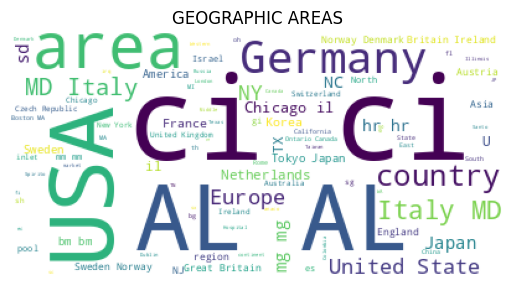

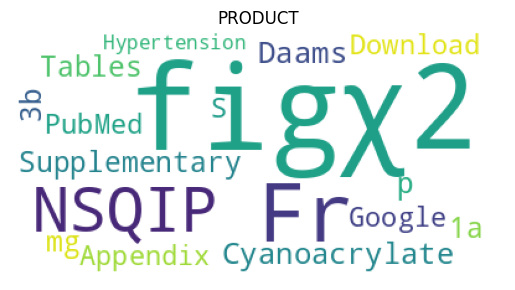

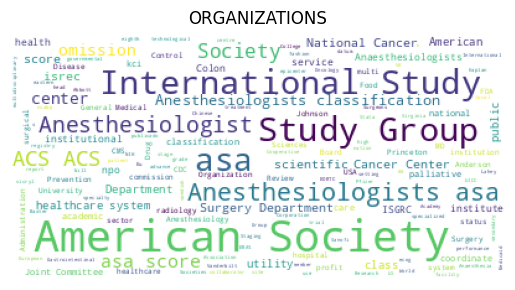

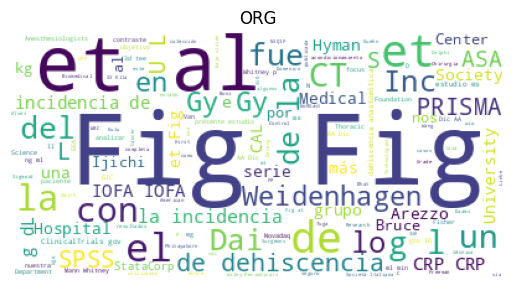

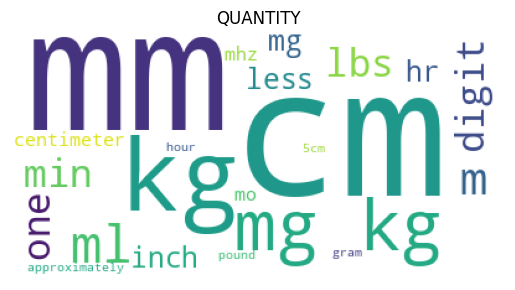

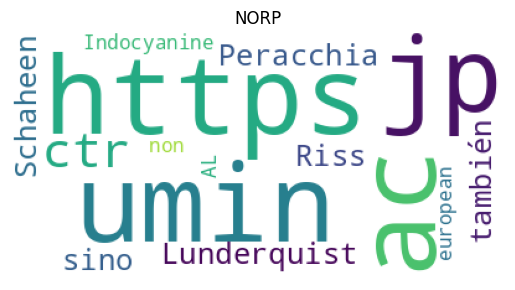

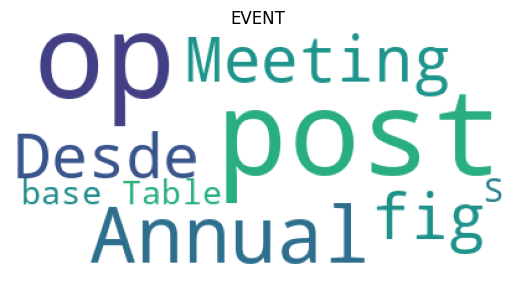

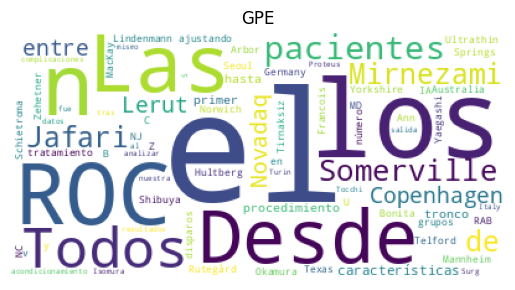

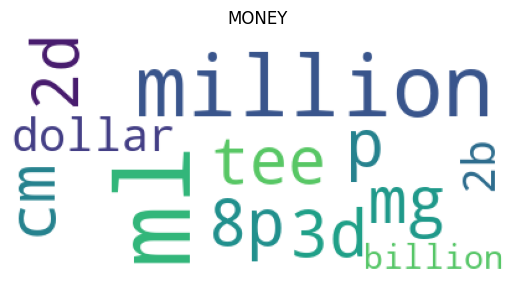

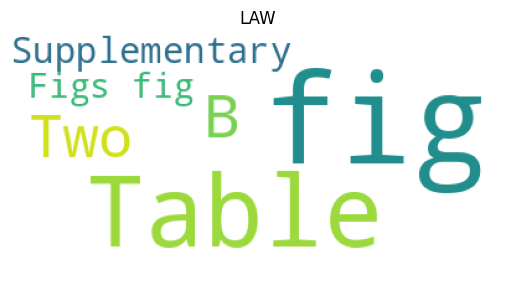

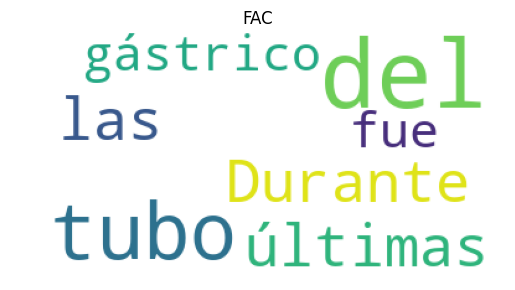

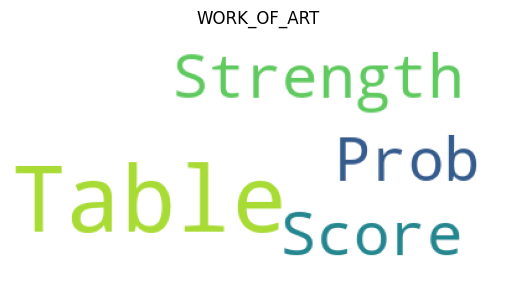

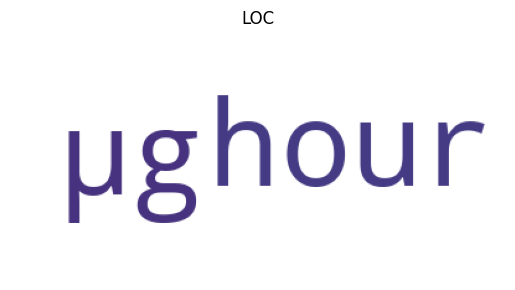

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for k in type_dictionnary.keys():
    plt.figure()
    clean_words_string = " ".join(type_dictionnary[k])
    wordcloud = WordCloud(background_color="white").generate(clean_words_string)
    plt.imshow(wordcloud)
    plt.title(k)
    plt.axis('off')
    plt.show()